통계 파일로부터 저장된 csv 파일 불러다가 플롯 그리는 역할.

In [5]:
# 사전 변수
csv_dir = '/home/hschoi/leehyunwon/ECG-SNN/new_server/ver6/statistics/channel.csv'
savefile_name = 'channel.pdf'

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



<Figure size 1000x600 with 0 Axes>

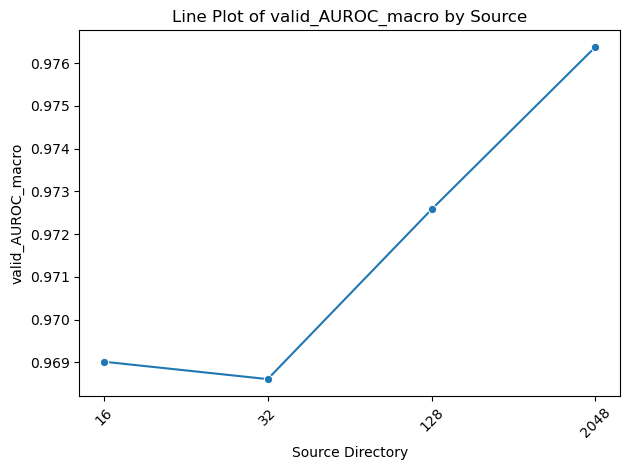

In [7]:
# CSV 파일 불러오기
data = pd.read_csv(csv_dir)
# data['source_dir'][0] = 'asdf'

# (채널 전용) 파일명 숫자로 안읽히게 조정
data['source_dir'] = data['source_dir'].astype(str)

# box plot 그리기
metrics = ["valid_Accuracy", "valid_F1_micro", "valid_AUROC_macro", "valid_auprc"]

plt.figure(figsize=(10, 6))
for metric in metrics:
    if metric == 'valid_AUROC_macro' : 
        plt.figure()
        sns.lineplot(data=data, x="source_dir", y=metric, marker="o", sort=False)
        plt.title(f"Line Plot of {metric} by Source")
        plt.xlabel("Source Directory")
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # pdf로 저장
        plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
        plt.show()

plt.close()